In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import sys

file = 'TSLA.csv'
#csv to read from
def read(file):
    df = pd.read_csv(file)
    df = pd.read_csv(file, index_col='Date')
    df.index = pd.to_datetime(df.index)
    df = df["2019":"2022-01"]
    df = df.iloc[:, 3:-2]  # Trim off the last 5 columns
    return df
rawData = read(file)
print(rawData)

In [ ]:
def calcVolatility(df):
    df['Volatility'] = df['Close'].rolling(window=20).std()  
    return df

rawDataVolatility = calcVolatility(rawData)
# Trim the first 4 rows
rawDataVolatility = rawDataVolatility.iloc[20:, :]
print(rawDataVolatility)

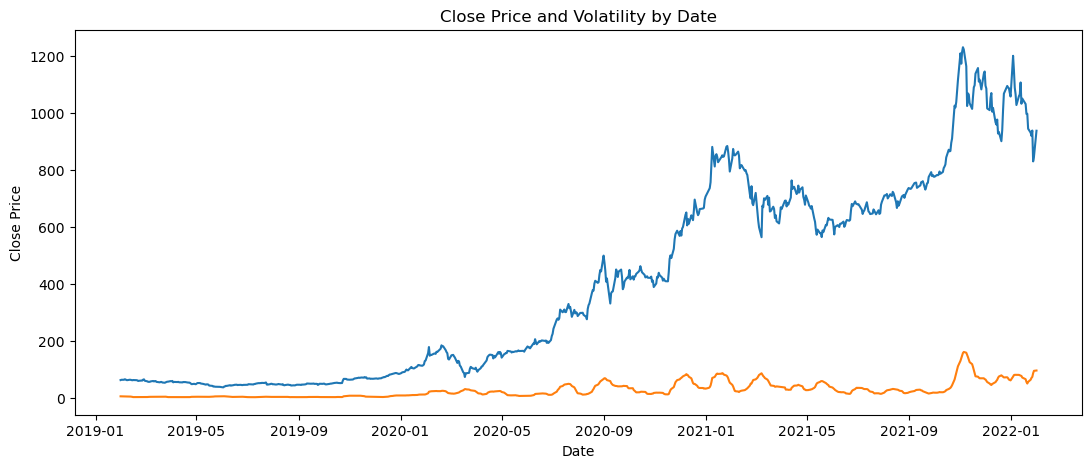

In [ ]:
# Plot the data
plt.figure(figsize=(13, 5))
plt.title("Close Price and Volatility by Date")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(rawDataVolatility["Close"])
plt.plot(rawDataVolatility["Volatility"])